In [17]:
import pandas as pd
#Read from file
df=pd.read_csv('USAID_Health_Comodity_Delivery.csv')

/tmp/ipykernel_30140/2227021015.py:3: DtypeWarning: Columns (74,75,76,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('USAID_Health_Comodity_Delivery.csv')


In [18]:
df['Latest Actual Delivery Date'] = pd.to_datetime(df['Latest Actual Delivery Date'])
df['Order Entry Date'] = pd.to_datetime(df['Order Entry Date'])

# Create the new column
df['Actual Lead Time'] = df['Latest Actual Delivery Date'] - df['Order Entry Date']
df['Actual Lead Time'] = df['Actual Lead Time'].dt.days

#Modify the reason code
df['Reason Code'] = df['Reason Code'].str.slice(0, 2)

In [19]:
categories = ['Country', 'Transportation Mode', 'Order Type', 'Fulfillment Method', 'Product Category', 
            'Vendor Incoterm', 'Reason Code', 'Item Tracer Category','Framework Contract']
numeric=['Manufacture','Pick Up','Quality Assurance','Illustrative Price','Ordered Quantity','Shipped Quantity','Number of Shipments',
         'RO Validation','Sourcing and Planning','USAID Approval','Process PO/DO','Reason Code Duration']
features=categories+numeric
target = ['Actual Lead Time']

In [20]:
# Label econding for the categorical data in df
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categories:
    df[i] = le.fit_transform(df[i])

#For every nan value use the average of the column group by 'Product Category'
for i in numeric:
    df[i] = df[i].fillna(df.groupby('Product Category')[i].transform('mean'))

df_train = df[features+target]
df_train.dropna(inplace=True)
df_train

/tmp/ipykernel_30140/2690207855.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.dropna(inplace=True)


,Country,Transportation Mode,Order Type,Fulfillment Method,Product Category,Vendor Incoterm,Reason Code,Item Tracer Category,Framework Contract,Manufacture,...,Illustrative Price,Ordered Quantity,Shipped Quantity,Number of Shipments,RO Validation,Sourcing and Planning,USAID Approval,Process PO/DO,Reason Code Duration,Actual Lead Time
10,93,1,1,0,11,38,3,13,1,90.751057,...,198.00,248,248,1,21.072767,52.848253,5.0,22.0,-4642.512304,229
11,53,1,1,0,11,38,3,13,1,90.751057,...,198.00,15,15,1,21.072767,52.848253,0.0,64.0,-4642.512304,111
12,53,1,1,0,11,38,3,13,1,90.751057,...,198.00,25,25,1,21.072767,52.848253,0.0,64.0,-4642.512304,184
26,19,1,1,0,11,38,3,13,1,90.751057,...,44.00,71,71,1,21.072767,52.848253,0.0,11.0,-4642.512304,67
27,19,1,1,0,11,38,3,13,1,90.751057,...,280.00,16,16,1,21.072767,52.848253,0.0,11.0,-4642.512304,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38498,93,0,1,0,15,77,1,22,0,42.000000,...,0.67,30000,30000,1,4.000000,145.000000,4.0,8.0,-1896.242718,303
38499,60,0,1,0,15,77,0,22,0,-3.000000,...,1.34,266000,266000,3,6.000000,117.000000,1.0,15.0,-128.000000,206
38500,94,0,1,0,3,77,3,16,0,75.648332,...,5.93,3892,3892,1,43.000000,78.000000,1.0,33.0,-1533.163729,298
38501,74,3,1,0,14,77,0,12,0,224.000000,...,2.79,486022,486022,1,1.000000,288.000000,1.0,8.0,-28030.000000,694


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from math import sqrt
import numpy as np
import pandas as pd  # Assuming df_train is a pandas DataFrame
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# Define the features and the target
X = df_train[features]
y = df_train[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=0)),
    ('Random Forest', RandomForestRegressor(random_state=0)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=0)),
    ('Support Vector', SVR())
]

# Loop through the models
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate the performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the performance metrics
    print(f'{name}:')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R-squared: {r2}\n')

    # Calculate and print errors
    errors = np.abs(y_test.values.ravel() - y_pred)
    print(f'Minimum error: {np.min(errors)}')
    print(f'Median error: {np.median(errors)}')
    print(f'Average error: {np.mean(errors)}')
    print(f'Maximum error: {np.max(errors)}\n')
    print('------------------------------------------------------------\n')



Linear Regression:
Root Mean Squared Error: 72.02652585379433
R-squared: 0.6998431021400757

Minimum error: 0.00022939748316730402
Median error: 111.641113520233
Average error: 134.6349921061511
Maximum error: 1255.8629352617804

------------------------------------------------------------

Decision Tree:
Root Mean Squared Error: 51.1650393504266
R-squared: 0.8485357919631931

Minimum error: 0.0
Median error: 1.0
Average error: 22.875519210799585
Maximum error: 470.0

------------------------------------------------------------



/home/nhatthuan97/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest:
Root Mean Squared Error: 39.133616131495124
R-squared: 0.9113939544343397

Minimum error: 0.0
Median error: 7.372500000000002
Average error: 19.544451088498235
Maximum error: 449.01

------------------------------------------------------------



/home/nhatthuan97/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting:
Root Mean Squared Error: 57.62540730203028
R-squared: 0.8078716692494153

Minimum error: 0.061263378640916244
Median error: 27.1110968050409
Average error: 39.86643893783061
Maximum error: 466.575986415079

------------------------------------------------------------



/home/nhatthuan97/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector:
Root Mean Squared Error: 128.18736293031364
R-squared: 0.04927739501412143

Minimum error: 0.012529675875157409
Median error: 84.46916775835196
Average error: 100.13592568328379
Maximum error: 740.6421000838704

------------------------------------------------------------



## Since randnom forest regressor is the best perfoming model Further analysis

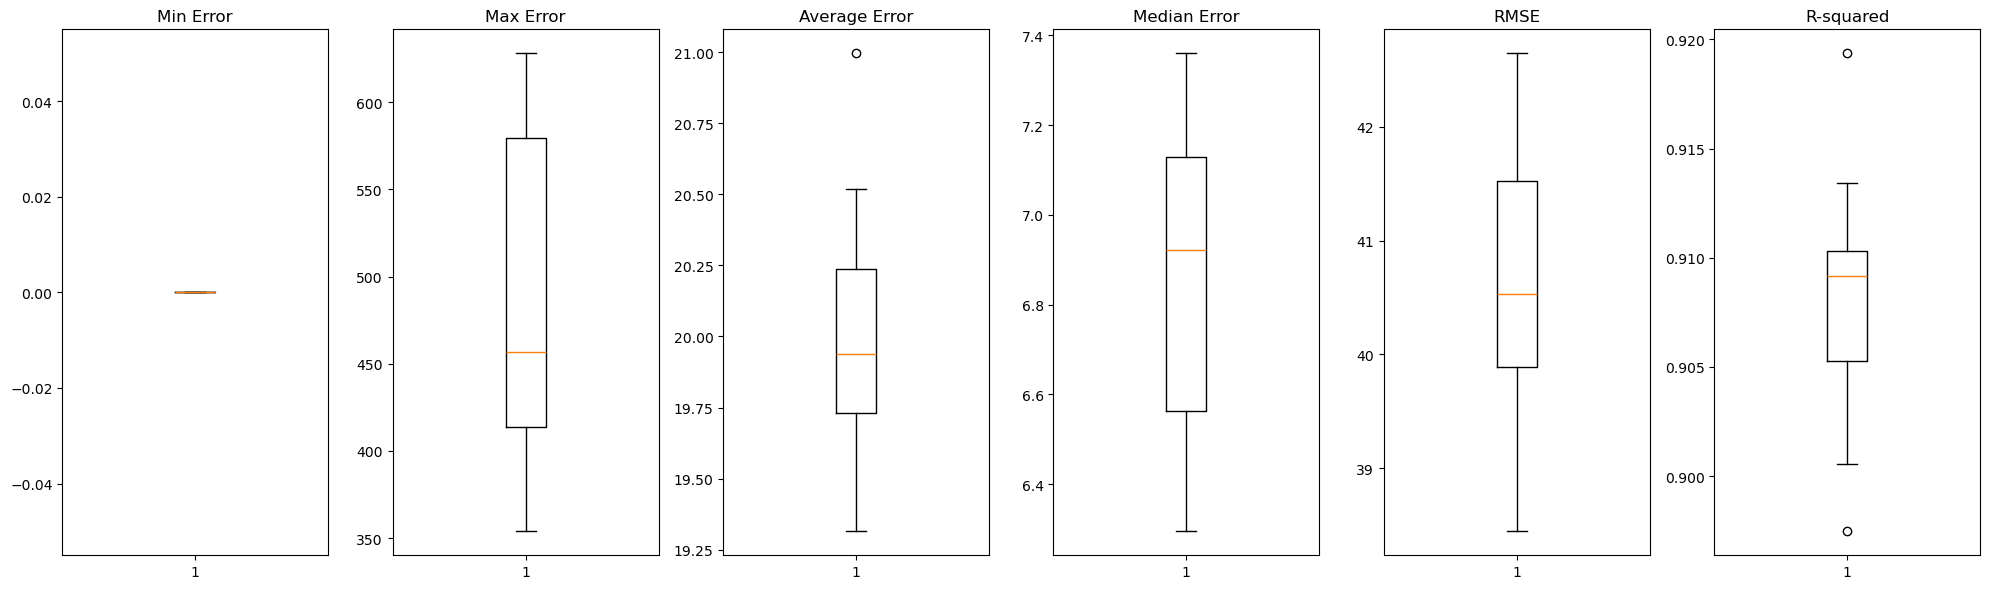

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_train is your DataFrame, and 'features' and 'target' are defined

# Initialize lists to store metrics
min_errors = []
max_errors = []
average_errors = []
median_errors = []
rmses = []
r2_scores = []

# Number of runs
n_runs = 10

for _ in range(n_runs):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=None)
    
    # Define and train the model
    model = RandomForestRegressor(random_state=None)  # random_state=None for different runs
    model.fit(X_train, y_train.values.ravel())
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate errors
    errors = np.abs(y_test.values.ravel() - y_pred)
    
    # Collect metrics
    min_errors.append(np.min(errors))
    max_errors.append(np.max(errors))
    average_errors.append(np.mean(errors))
    median_errors.append(np.median(errors))
    rmses.append(sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))

# Prepare data for plotting
metrics = [min_errors, max_errors, average_errors, median_errors, rmses, r2_scores]
metric_names = ['Min Error', 'Max Error', 'Average Error', 'Median Error', 'RMSE', 'R-squared']

# Plotting
fig, axs = plt.subplots(nrows=1, ncols=len(metric_names), figsize=(20, 6), sharey=False)
for i, metric in enumerate(metrics):
    axs[i].boxplot(metric)
    axs[i].set_title(metric_names[i])

plt.tight_layout()
plt.show()


In [23]:
print('Min Error:',min_errors)
print('Max Error:',max_errors)
print('Average Error:',average_errors)
print('Median Error:',median_errors)
print('RMSE Error:',rmses)
print('R-squared Error:',r2_scores)

Min Error: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Max Error: [457.44000000000005, 621.4100000000001, 461.82, 401.9, 449.99, 618.46, 628.05, 353.90999999999997, 363.63, 455.80999999999995]
Average Error: [20.122286888691097, 20.99575845282593, 20.519193842512614, 19.755296194832052, 19.73191378773579, 19.5400676921649, 20.235070667842965, 19.314805336427842, 20.23647577401856, 19.730789460478384]
Median Error: [7.0049999999999955, 7.105000000000004, 7.360000000000014, 6.574999999999989, 6.4950000000000045, 6.295000000000016, 7.137499999999989, 6.5600000000000005, 7.209999999999994, 6.840000000000018]
RMSE Error: [40.47076739431243, 42.64777402633253, 41.13879132087887, 39.1838675319884, 39.86321195650598, 41.657240611970344, 42.31648603254057, 38.444155472047065, 39.98110605440553, 40.59270470950936]
R-squared Error: [0.9101206129593007, 0.8974687693915744, 0.9101727583497294, 0.9134166328100727, 0.9103516942648919, 0.9043245230253462, 0.9005662277355336, 0.9193675475308443,

RO Validation: 0.0702
Pick Up: 0.1237
Manufacture: 0.1528
Process PO/DO: 0.1573
Sourcing and Planning: 0.2433


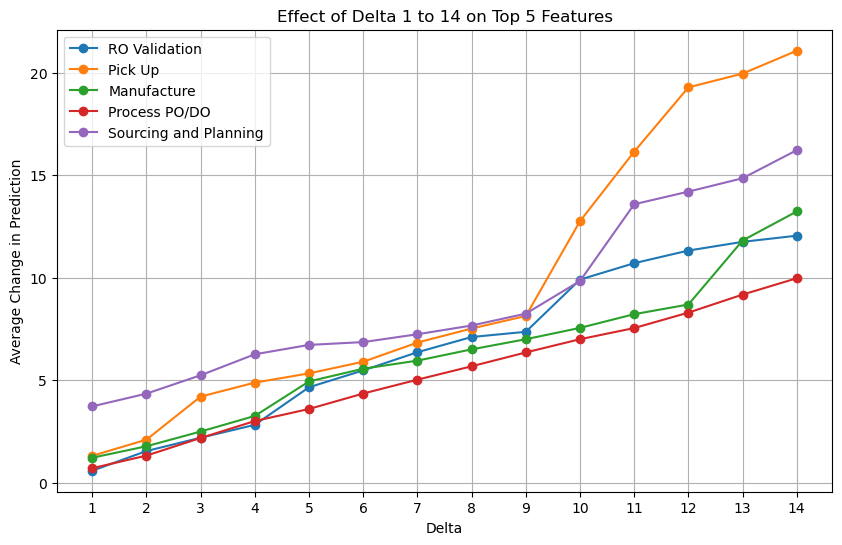

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd  # Ensure pandas is imported if it's not already

# Assuming df_train, features, and target are defined

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train.values.ravel())

# Get the indices of the top 5 most important features
top_5_indices = np.argsort(model.feature_importances_)[-5:]

#Output the top 5 features
for index in top_5_indices:
    print(f'{features[index]}: {model.feature_importances_[index]:.4f}')



# Initialize a dictionary to hold the effects for each feature across deltas from 1 to 14
effects = {features[index]: [] for index in top_5_indices}

# Loop through deltas from 1 to 14
for delta in range(1, 15):
    for index in top_5_indices:
        feature_name = features[index]
        
        # Create a modified copy of X_test for the current feature and delta
        X_test_modified = X_test.copy()
        X_test_modified[feature_name] += delta
        
        # Make predictions with the original and modified datasets
        predictions_original = model.predict(X_test)
        predictions_modified = model.predict(X_test_modified)
        
        # Calculate the average effect of the delta
        average_effect = np.mean(predictions_modified - predictions_original)
        
        # Append the effect to the corresponding feature's list in the dictionary
        effects[feature_name].append(average_effect)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Each feature will have its own plot line
for feature, deltas_effects in effects.items():
    ax.plot(range(1, 15), deltas_effects, marker='o', label=feature)

ax.set_xlabel('Delta')
ax.set_ylabel('Average Change in Prediction')
ax.set_title('Effect of Delta 1 to 14 on Top 5 Features')
ax.legend()

plt.xticks(range(1, 15))
plt.grid(True)
plt.show()